In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
import scipy.stats as sps
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler

In [8]:
canada=pd.read_csv('Canada.csv')

In [9]:
print("Data Imigran :",canada.shape)

Data Imigran : (196, 43)


In [10]:
canada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 43 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Type      196 non-null    object
 1   Coverage  196 non-null    object
 2   OdName    196 non-null    object
 3   AREA      196 non-null    int64 
 4   AreaName  196 non-null    object
 5   REG       196 non-null    int64 
 6   RegName   196 non-null    object
 7   DEV       196 non-null    int64 
 8   DevName   196 non-null    object
 9   1980      196 non-null    int64 
 10  1981      196 non-null    int64 
 11  1982      196 non-null    int64 
 12  1983      196 non-null    int64 
 13  1984      196 non-null    int64 
 14  1985      196 non-null    int64 
 15  1986      196 non-null    int64 
 16  1987      196 non-null    int64 
 17  1988      196 non-null    int64 
 18  1989      196 non-null    int64 
 19  1990      196 non-null    int64 
 20  1991      196 non-null    int64 
 21  1992      196 no

In [12]:
canada.head(15)

Type    Coverage               OdName  AREA  \
0   Immigrants  Foreigners          Afghanistan   935   
1   Immigrants  Foreigners              Albania   908   
2   Immigrants  Foreigners              Algeria   903   
3   Immigrants  Foreigners       American Samoa   909   
4   Immigrants  Foreigners              Andorra   908   
5   Immigrants  Foreigners               Angola   903   
6   Immigrants  Foreigners  Antigua and Barbuda   904   
7   Immigrants  Foreigners            Argentina   904   
8   Immigrants  Foreigners              Armenia   935   
9   Immigrants  Foreigners            Australia   909   
10  Immigrants  Foreigners              Austria   908   
11  Immigrants  Foreigners           Azerbaijan   935   
12  Immigrants  Foreigners              Bahamas   904   
13  Immigrants  Foreigners              Bahrain   935   
14  Immigrants  Foreigners           Bangladesh   935   

                           AreaName   REG                    RegName  DEV  \
0                              Asia  5501              Southern Asia  902   
1                            Europe   925            Southern Europe  901   
2                            Africa   912            Northern Africa  902   
3                           Oceania   957                  Polynesia  902   
4                            Europe   925            Southern Europe  901   
5                            Africa   911              Middle Africa  902   
6   Latin America and the Caribbean   915                  Caribbean  902   
7   Latin America and the Caribbean   931              South America  902   
8                              Asia   922               Western Asia  902   
9                           Oceania   927  Australia and New Zealand  901   
10                           Europe   926             Western Europe  901   
11                             Asia   922               Western Asia  902   
12  Latin America and the Caribbean   915                  Caribbean  902   
13                             Asia   922               Western Asia  902   
14                             Asia  5501              Southern Asia  902   

               DevName  1980  ...  2004  2005  2006  2007  2008  2009  2010  \
0   Developing regions    16  ...  2978  3436  3009  2652  2111  1746  1758   
1    Developed regions     1  ...  1450  1223   856   702   560   716   561   
2   Developing regions    80  ...  3616  3626  4807  3623  4005  5393  4752   
3   Developing regions     0  ...     0     0     1     0     0     0     0   
4    Developed regions     0  ...     0     0     1     1     0     0     0   
5   Developing regions     1  ...   268   295   184   106    76    62    61   
6   Developing regions     0  ...    14    24    32    15    32    38    27   
7   Developing regions   368  ...  1591  1153   847   620   540   467   459   
8   Developing regions     0  ...   147   224   218   198   205   267   252   
9    Developed regions   702  ...   930   909   875  1033  1018  1018   933   
10   Developed regions   234  ...   118   122   102    98    91   109   124   
11  Developing regions     0  ...   230   359   236   203   125   165   209   
12  Developing regions    26  ...    13    14    18    23    30    27    25   
13  Developing regions     0  ...    12    12    12    22     9    35    28   
14  Developing regions    83  ...  2660  4171  4014  2897  2939  2104  4721   

    2011  2012  2013  
0   2203  2635  2004  
1    539   620   603  
2   4325  3774  4331  
3      0     0     0  
4      0     1     1  
5     39    70    45  
6     37    51    25  
7    278   263   282  
8    236   258   207  
9    851   982  1121  
10    84   102    90  
11   138   161    57  
12    40    60    55  
13    21    39    32  
14  2694  2640  3789  

[15 rows x 43 columns]

In [13]:
display(canada.describe(include=np.number).transpose())
display(canada.describe(include=object).transpose())

count         mean          std    min     25%    50%     75%      max
AREA  196.0   913.204082    14.429997  903.0  903.00  908.0  935.00    999.0
REG   196.0  1247.739796  1182.618008  905.0  914.00  922.0  926.00   5501.0
DEV   196.0   902.250000     6.959498  901.0  902.00  902.0  902.00    999.0
1980  196.0   730.290816  3664.971286    0.0    0.00   13.5  263.00  44000.0
1981  196.0   656.331633  2484.869895    0.0    0.00   10.0  296.75  24796.0
1982  196.0   618.239796  2198.843498    0.0    0.00   11.5  292.25  20620.0
1983  196.0   455.025510  1529.175952    0.0    0.00   12.0  181.25  13635.0
1984  196.0   450.367347  1580.492649    0.0    0.00   13.5  189.00  14855.0
1985  196.0   430.336735  1469.775915    0.0    0.00   17.0  199.00  14368.0
1986  196.0   506.892857  1529.161726    0.0    0.75   19.5  257.00  13303.0
1987  196.0   775.892857  2415.374270    0.0    0.75   29.5  451.25  21337.0
1988  196.0   824.413265  2883.263236    0.0    1.00   35.0  426.50  27359.0
1989  196.0   977.295918  3164.973367    0.0    1.00   44.5  526.75  27118.0
1990  196.0  1104.341837  3710.248429    0.0    2.00   38.0  615.50  31668.0
1991  196.0  1187.765306  3415.443419    0.0    3.00   55.0  665.50  25293.0
1992  196.0  1299.933673  4030.514942    0.0    6.75   75.0  683.00  34123.0
1993  196.0  1309.377551  4226.428574    0.0   11.75   88.5  736.25  34589.0
1994  196.0  1144.806122  4182.933697    0.0    9.75   77.0  560.00  39231.0
1995  196.0  1086.040816  3534.635605    0.0   10.75   95.5  578.00  30145.0
1996  196.0  1153.423469  3761.826578    0.0   14.75  120.0  625.25  29322.0
1997  196.0  1102.224490  3447.763517    0.0   20.75  114.5  622.25  23151.0
1998  196.0   888.750000  2545.421334    0.0   15.00  106.5  545.75  21049.0
1999  196.0   969.132653  2954.390519    0.0   16.50  116.5  567.25  30069.0
2000  196.0  1160.484694  3718.826353    0.0   16.00  139.0  745.75  35529.0
2001  196.0  1278.755102  3980.744966    0.0   22.00  172.0  799.50  36434.0
2002  196.0  1168.617347  3667.202903    0.0   19.25  166.5  699.25  31961.0
2003  196.0  1129.331633  3620.292604    0.0   21.75  163.0  683.25  36439.0
2004  196.0  1203.173469  3705.454268    0.0   20.00  193.5  789.50  36619.0
2005  196.0  1337.969388  4421.525944    0.0   28.75  210.5  852.50  42584.0
2006  196.0  1283.877551  3923.791864    0.0   25.50  224.0  849.25  33848.0
2007  196.0  1207.923469  3442.092092    0.0   31.50  198.0  940.50  28742.0
2008  196.0  1261.448980  3691.110002    0.0   31.50  205.0  956.25  30037.0
2009  196.0  1286.581633  3822.816364    0.0   36.50  215.5  907.25  29622.0
2010  196.0  1432.076531  4454.546970    0.0   41.25  213.5  938.00  38617.0
2011  196.0  1269.122449  4020.795822    0.0   37.75  187.5  815.75  36765.0
2012  196.0  1315.831633  4236.731113    0.0   42.75  234.0  790.00  34315.0
2013  196.0  1321.535714  4227.087570    0.0   45.00  215.0  826.50  34129.0

count unique                 top freq
Type       196      1          Immigrants  196
Coverage   196      2          Foreigners  195
OdName     196    196         Afghanistan    1
AreaName   196      7              Africa   54
RegName    196     23        Western Asia   18
DevName    196      3  Developing regions  147

In [14]:
def countplot(column):
    return sb.countplot(x=column,data=canada)

<Axes: xlabel='AREA', ylabel='count'>

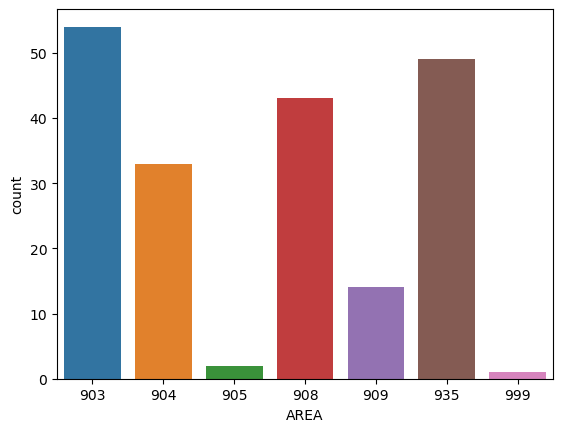

In [15]:
countplot('AREA')

<Axes: xlabel='REG', ylabel='count'>

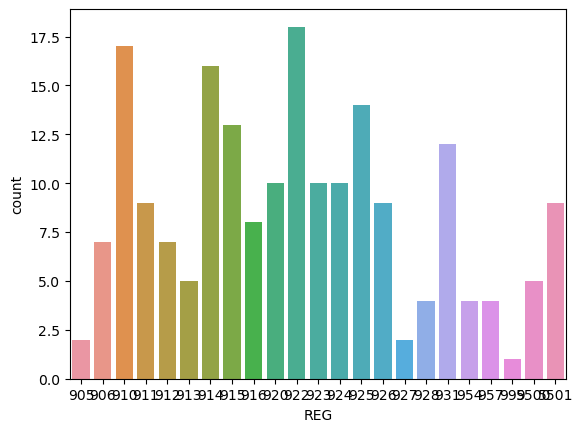

In [16]:
countplot('REG')

<Axes: xlabel='Type', ylabel='count'>

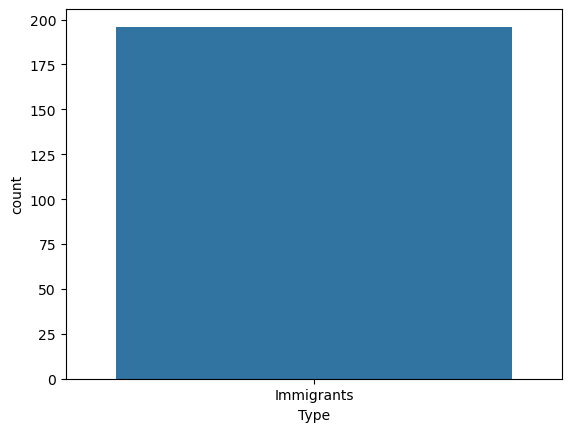

In [17]:
countplot('Type')

<Axes: xlabel='DEV', ylabel='count'>

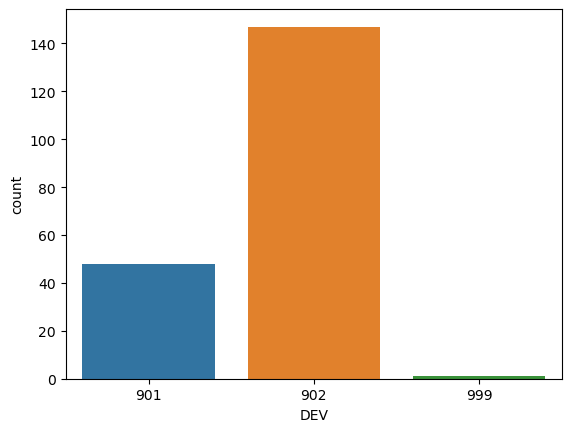

In [18]:
countplot('DEV')

<Axes: xlabel='OdName', ylabel='count'>

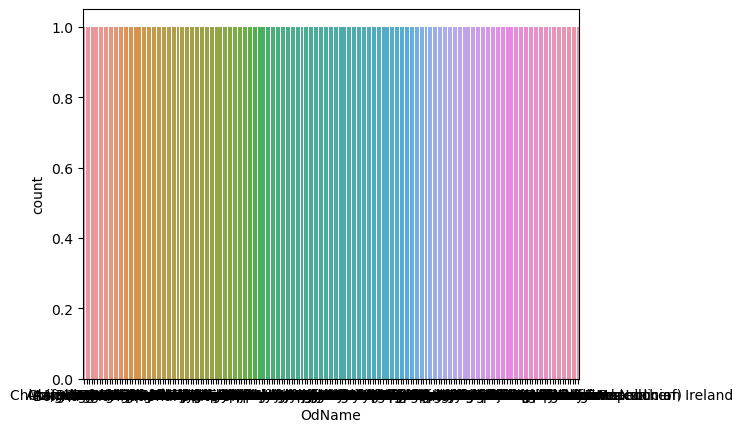

In [20]:
countplot('OdName')

<Axes: xlabel='RegName', ylabel='count'>

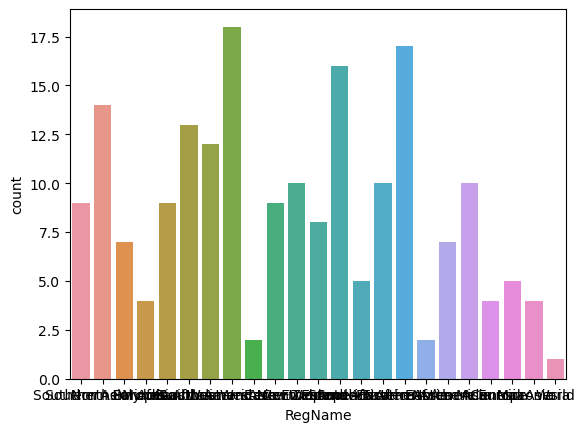

In [21]:
countplot('RegName')

<Axes: xlabel='AreaName', ylabel='count'>

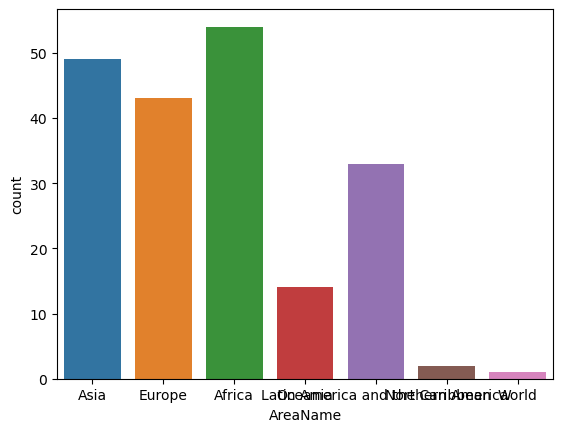

In [22]:
countplot('AreaName')

<Axes: xlabel='DevName', ylabel='count'>

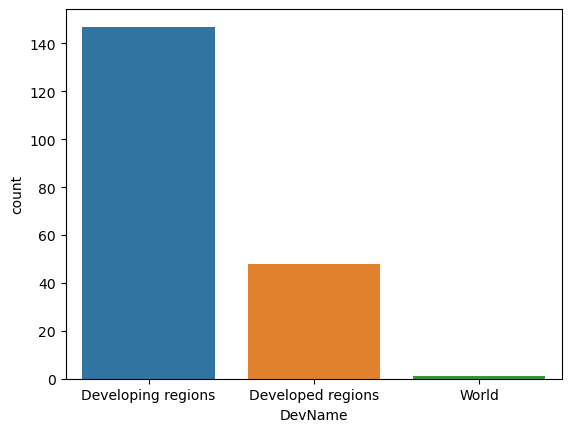

In [23]:
countplot('DevName')

<Axes: xlabel='2013', ylabel='count'>

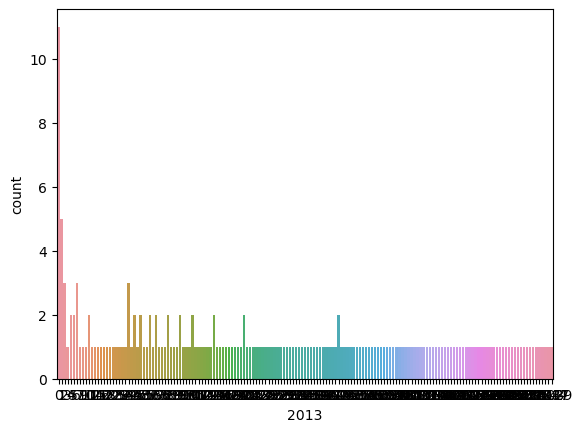

In [34]:
countplot('2013')

<Axes: xlabel='1980', ylabel='count'>

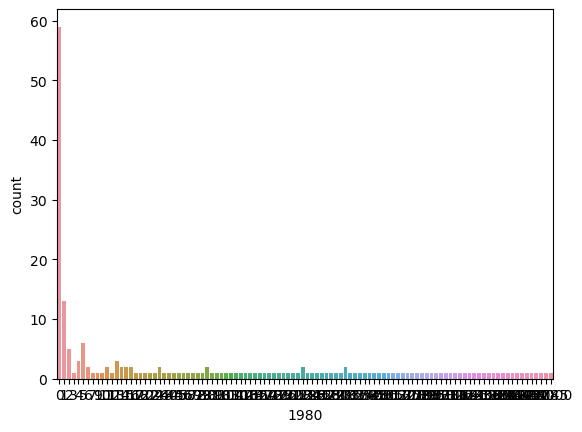

In [37]:
countplot('1980')

<Axes: xlabel='DEV', ylabel='2013'>

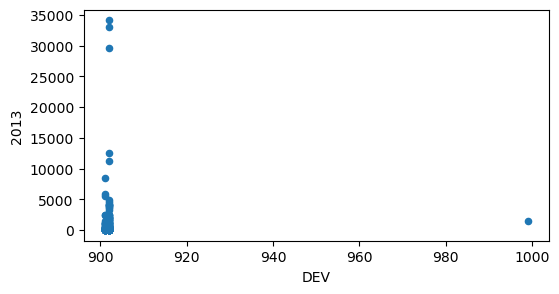

In [26]:
canada.plot.scatter(x='DEV', y='2013',figsize=(6,3))

<Axes: xlabel='AreaName', ylabel='2013'>

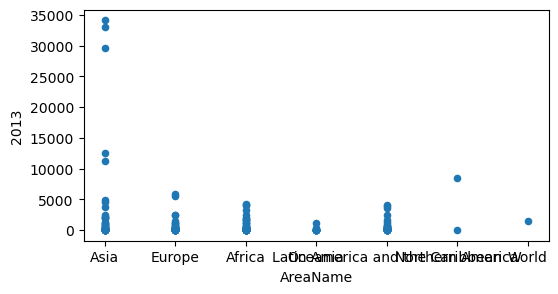

In [28]:
canada.plot.scatter(x='AreaName', y='2013',figsize=(6,3))

In [29]:
def compute_freq_chi2(x,y):
    ha=pd.crosstab(x,y)
    print("Hubungan Antara Attribute")
    print("=========================")
    print(ha)
    print("=========================")
    return

In [47]:
compute_freq_chi2(canada.AreaName,canada.DEV)

Hubungan Antara Attribute
DEV                              901  902  999
AreaName                                      
Africa                             0   54    0
Asia                               1   48    0
Europe                            43    0    0
Latin America and the Caribbean    0   33    0
Northern America                   2    0    0
Oceania                            2   12    0
World                              0    0    1


In [48]:
compute_freq_chi2(canada.AREA,canada.DevName)

Hubungan Antara Attribute
DevName  Developed regions  Developing regions  World
AREA                                                 
903                      0                  54      0
904                      0                  33      0
905                      2                   0      0
908                     43                   0      0
909                      2                  12      0
935                      1                  48      0
999                      0                   0      1


<Axes: xlabel='Coverage', ylabel='AREA'>

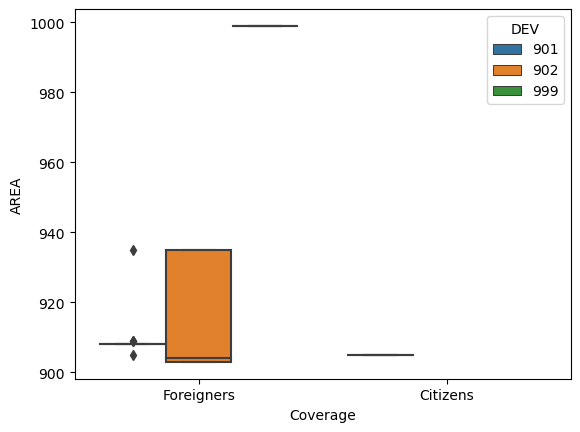

In [60]:
sb.boxplot(x="Coverage",y="AREA",hue="DEV",data=canada)

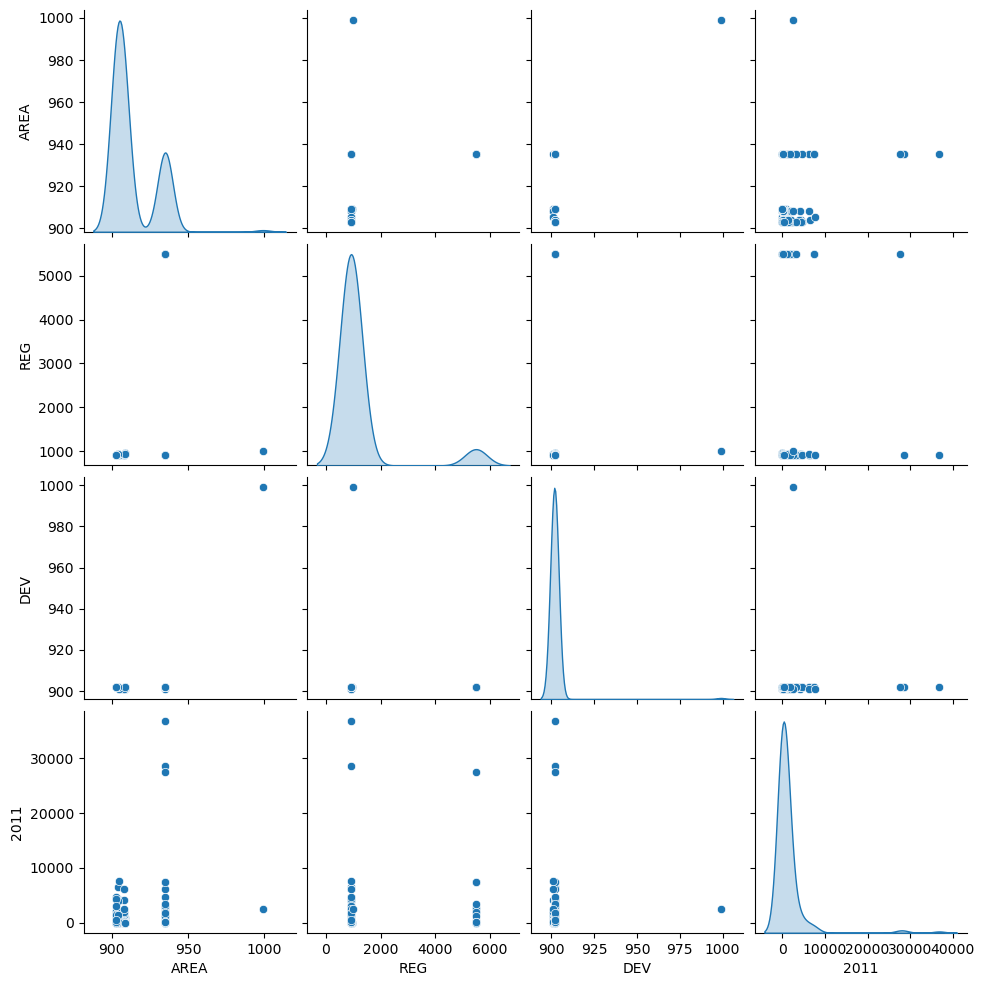

In [53]:
col=["AREA","Type","Coverage","REG","DEV","2011"]
sb.pairplot(canada[col],kind='scatter', diag_kind='kde')
plt.show()

In [61]:
canada.duplicated(keep=False).sum()

0

In [70]:
def cek_data_kosong(df):
    col_na=df.isnull().sum().sort_values(ascending=False)
    percent=col_na/len(df)
    
    data_hilang=pd.concat([col_na,percent],axis=1,keys=['Total','Percent'])
    print(data_hilang[data_hilang['Total']>0])

In [71]:
cek_data_kosong(canada)

Empty DataFrame
Columns: [Total, Percent]
Index: []


In [77]:
kanada=pd.read_csv('Canada1.csv')

In [84]:
kanada.head(15)

Unnamed: 0  Unnamed: 1        Unnamed: 2          Unnamed: 3 Unnamed: 4  \
19        Type    Coverage          AreaName             RegName       1980   
20  Immigrants    Citizens  Northern America    Northern America         ..   
21  Immigrants  Foreigners            Africa      Eastern Africa       1471   
22  Immigrants  Foreigners            Africa       Middle Africa         33   
23  Immigrants  Foreigners            Africa     Northern Africa       1100   
24  Immigrants  Foreigners            Africa     Southern Africa       1041   
25  Immigrants  Foreigners            Africa      Western Africa        306   
26  Immigrants  Foreigners      Africa Total                 NaN       3951   
27  Immigrants  Foreigners              Asia        Central Asia         ..   
28  Immigrants  Foreigners              Asia        Eastern Asia       6836   
29  Immigrants  Foreigners              Asia  South-Eastern Asia       8693   
30  Immigrants  Foreigners              Asia       Southern Asia      11315   
31  Immigrants  Foreigners              Asia        Western Asia       4181   
32  Immigrants  Foreigners        Asia Total                 NaN      31025   
33  Immigrants  Foreigners            Europe      Eastern Europe       1467   

   Unnamed: 5 Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 28  \
19       1981       1982       1983       1984       1985  ...        2004   
20         ..         ..         ..         ..         ..  ...          ..   
21       1641       1426       1094       1187       1134  ...        7726   
22         27         44         32         42         30  ...        2452   
23       1268       1348        936        842        840  ...       12478   
24       1126        791        387        297        327  ...        1203   
25        301        210        222        271        319  ...        4333   
26       4363       3819       2671       2639       2650  ...       28192   
27         ..         ..         ..         ..         ..  ...         995   
28       8895       5481       3254       2624       2979  ...       43550   
29       9191       9022       8845      12161       9787  ...       18056   
30      11566      11591      10157       9607       7654  ...       58521   
31       4662       4120       2440       2882       3430  ...       13728   
32      34314      30214      24696      27274      23850  ...      134850   
33       3698       6873       5459       4433       3969  ...       18360   

   Unnamed: 29 Unnamed: 30 Unnamed: 31 Unnamed: 32 Unnamed: 33 Unnamed: 34  \
19        2005        2006        2007        2008        2009        2010   
20          ..          ..          ..          ..          ..          ..   
21        7083        6750        6669        6705        6922        8591   
22        2802        2834        2951        3034        3255        3369   
23       11323       12705       11750       13456       16320       19271   
24        1012        1148        1230        1184        1235        1306   
25        5303        5751        5684        5511        6802        8355   
26       27523       29188       28284       29890       34534       40892   
27        1134         903         936         805         962         905   
28       50306       41763       35591       39602       37497       37954   
29       22809       25105       27256       30614       34166       44199   
30       69510       66742       56032       54154       53083       62284   
31       15494       14541       13644       14719       15726       18503   
32      159253      149054      133459      139894      141434      163845   
33       16724       14389       13886       11988       11759       11803   

    Unnamed: 35 Unnamed: 36  Unnamed: 37  
19         2011      2012.0       2013.0  
20            1         1.0          NaN  
21         8956      8846.0          NaN  
22         3146      4602.0          NaN  
23        15712     15453.